In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import ml_utils

In [2]:
data = ml_utils.load_data()
train_data, test_data = ml_utils.train_test_split(data)

In [3]:
pca = PCA(64)
pca.fit(train_data)
train_data_principal_components = pca.transform(train_data)


In [4]:
pca_min = train_data_principal_components.min()
pca_max = train_data_principal_components.max()


In [5]:
img_indices = [0, 3, 6]
imgs_original = [train_data[img_index] for img_index in img_indices]
imgs_principal_components = [train_data_principal_components[img_index] for img_index in img_indices]
imgs_transformed = [pca.inverse_transform(img_principal_components) for img_principal_components in
                    imgs_principal_components]

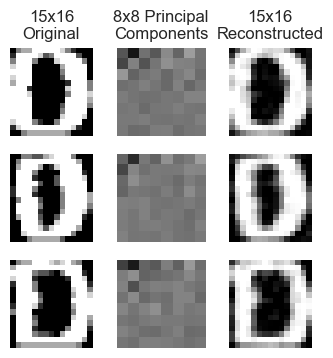

In [9]:
n_rows = len(img_indices)
n_columns = 3
fig = plt.figure(figsize=(4, n_rows * 1.3))

for row in range(n_rows):
    row_offset = row * n_columns
    fig.add_subplot(n_rows, n_columns, 1 + row_offset)
    plt.imshow(imgs_original[row].reshape(16, 15), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    if row == 0:
        plt.title('15x16\nOriginal')

    fig.add_subplot(n_rows, n_columns, 2 + row_offset)
    plt.imshow(imgs_principal_components[row].reshape(8, 8), cmap='gray', vmin=pca_min, vmax=pca_max)
    plt.axis('off')
    if row == 0:
        plt.title('8x8 Principal\nComponents')

    fig.add_subplot(n_rows, n_columns, 3 + row_offset)
    plt.imshow(imgs_transformed[row].reshape(16, 15), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    if row == 0:
        plt.title('15x16\nReconstructed')

plt.show(fig)

In [11]:
fig.savefig('figures/pca_example.svg', bbox_inches='tight')

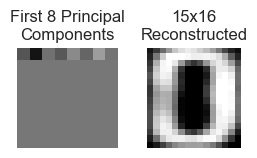

In [19]:
test = imgs_principal_components[0]
retain_first = 8
test = np.concatenate([test[:retain_first], np.zeros(64 - retain_first)], axis=0)

n_rows = 1
n_columns = 2
fig = plt.figure(figsize=(3, n_rows * 1.3))
row = 0

row_offset = row * n_columns
fig.add_subplot(n_rows, n_columns, 1 + row_offset)
plt.imshow(test.reshape(8, 8), cmap='gray', vmin=pca_min, vmax=pca_max)
plt.axis('off')
if row == 0:
    plt.title('First 8 Principal\nComponents')

fig.add_subplot(n_rows, n_columns, 2 + row_offset)
plt.imshow(pca.inverse_transform(test).reshape(16, 15), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
if row == 0:
    plt.title('15x16\nReconstructed')

plt.show(fig)

In [22]:
fig.savefig('figures/pca_example_stripped.svg', bbox_inches='tight')

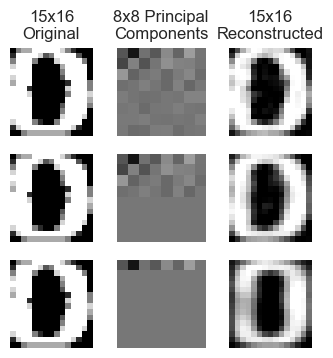

In [34]:
def strip(img, retain_first):
    return np.concatenate([img[:retain_first], np.zeros(64 - retain_first)], axis=0)

test_img = 0
img_original = train_data[test_img]
img_principal_components = train_data_principal_components[test_img]
imgs_original = [img_original for _ in range(3)]
imgs_principal_components = [strip(img_principal_components, retain_first) for retain_first in [64, 32, 8]]
imgs_transformed = [pca.inverse_transform(img_principal_components) for img_principal_components in imgs_principal_components]

n_rows = len(img_indices)
n_columns = 3
fig = plt.figure(figsize=(4, n_rows * 1.3))

for row in range(n_rows):
    row_offset = row * n_columns
    fig.add_subplot(n_rows, n_columns, 1 + row_offset)
    plt.imshow(imgs_original[row].reshape(16, 15), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    if row == 0:
        plt.title('15x16\nOriginal')

    fig.add_subplot(n_rows, n_columns, 2 + row_offset)
    plt.imshow(imgs_principal_components[row].reshape(8, 8), cmap='gray', vmin=pca_min, vmax=pca_max)
    plt.axis('off')
    if row == 0:
        plt.title('8x8 Principal\nComponents')

    fig.add_subplot(n_rows, n_columns, 3 + row_offset)
    plt.imshow(imgs_transformed[row].reshape(16, 15), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    if row == 0:
        plt.title('15x16\nReconstructed')

plt.show(fig)

In [35]:
fig.savefig('figures/pca_multiple_strips.svg', bbox_inches='tight')

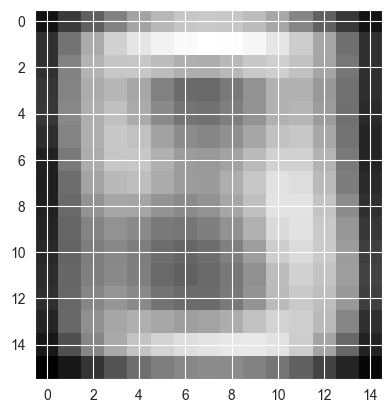

In [32]:
plt.imshow(pca.inverse_transform(np.zeros(64)).reshape(16, 15), cmap='gray')